<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/ppg_clustering_complete_5_pca_and_kmeans_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time

In [4]:
# variables declearation 

ppgData = pd.DataFrame()   # to store dataFrame from files like 1.csv
featureDf = pd.DataFrame()  # to store all features like PCA and Systolic and Diastolic of all data
ppg_pca = pd.DataFrame()    # to store all pca of all data 
ABP_sys_dia = pd.DataFrame() # to store all systolic and diastolic obtained from ABP signals of all data



In [5]:
data = pd.read_csv("/content/gdrive/MyDrive/data/sys_dia_pca1_pca2.csv")

In [6]:
data["sys_dia"] = data["systolic"] / data['diastolic']

In [7]:
data.head()

,Unnamed: 0,systolic,diastolic,pca1,pca2,sys_dia
0,0,144.43,52.947,0.448304,0.068589,2.727822
1,1,144.43,52.947,0.108880,-0.028446,2.727822
2,2,143.36,52.752,0.464056,0.471354,2.717622
3,3,146.48,54.998,-0.089028,-0.016251,2.663370
4,4,177.11,65.060,-0.213127,0.035350,2.722256


In [8]:
data.shape

(205851, 6)

In [9]:

data = data.drop("diastolic",axis = 1)
data = data.drop("systolic",axis = 1)
data = data.drop("Unnamed: 0",axis = 1)

In [10]:

data.head()

,pca1,pca2,sys_dia
0,0.448304,0.068589,2.727822
1,0.108880,-0.028446,2.727822
2,0.464056,0.471354,2.717622
3,-0.089028,-0.016251,2.663370
4,-0.213127,0.035350,2.722256


In [11]:
pca100 = pd.read_csv("/content/gdrive/MyDrive/data/pca100_200000.csv")

In [12]:
pca100 = pca100.drop("Unnamed: 0",axis = 1)

In [13]:
pca100.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.077099,0.008250,0.089586,-0.289935,-0.570302,-0.484658,-0.344536,0.136777,0.164105,0.473387,...,-0.304129,0.066408,-0.684151,0.248354,0.283769,-0.099543,-0.047795,0.073108,-0.007069,-0.043373
1,-0.037167,0.024483,-0.269724,0.003319,0.651969,-0.124959,-0.540595,-0.387883,-2.615635,0.288488,...,-0.021529,0.020735,0.039339,-0.075257,0.054235,0.074464,-0.025567,-0.278888,-0.292766,0.328671
2,-0.043720,0.070500,-0.033452,-0.104492,-0.270062,-0.616881,-0.877861,0.467273,-1.285693,-0.838808,...,-0.020174,-0.018929,0.004956,0.020363,-0.074594,0.122422,0.117770,0.058375,0.219939,-0.224448
3,-0.174014,0.250102,-0.146418,-0.262774,-0.098997,1.378107,0.706295,-1.929878,0.818218,-5.862694,...,0.031464,0.013131,0.011680,0.063911,0.091819,0.062477,-0.093273,0.062628,-0.042655,0.042015
4,0.246043,0.894327,0.282888,-1.227441,5.314705,1.737169,-6.058750,0.271721,0.450567,0.281494,...,-0.141160,0.020925,0.052590,0.193319,-0.522119,0.338197,-0.211511,0.117344,-0.017643,0.015899


In [14]:
data["pca1"] = pca100['0']
data["pca2"] = pca100['1']
data["pca3"] = pca100['2']
data["pca4"] = pca100['3']
data["pca5"] = pca100['4']


In [15]:
data.head()

,pca1,pca2,sys_dia,pca3,pca4,pca5
0,-0.077099,0.008250,2.727822,0.089586,-0.289935,-0.570302
1,-0.037167,0.024483,2.727822,-0.269724,0.003319,0.651969
2,-0.043720,0.070500,2.717622,-0.033452,-0.104492,-0.270062
3,-0.174014,0.250102,2.663370,-0.146418,-0.262774,-0.098997
4,0.246043,0.894327,2.722256,0.282888,-1.227441,5.314705


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


 
# initialise kmeans
kmeans = KMeans(n_clusters=6,max_iter = 10000)
kmeans.fit(data)
cluster_labels = kmeans.labels_


In [17]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [18]:
print("number of datasets of cluster 0 = ",cluster_labels[cluster_labels == 0].shape[0])
print("number of datasets of cluster 1 = ",cluster_labels[cluster_labels == 1].shape[0])
print("number of datasets of cluster 2 = ",cluster_labels[cluster_labels == 2].shape[0])
print("number of datasets of cluster 3 = ",cluster_labels[cluster_labels == 3].shape[0])
print("number of datasets of cluster 4 = ",cluster_labels[cluster_labels == 4].shape[0])
print("number of datasets of cluster 5 = ",cluster_labels[cluster_labels == 5].shape[0])


number of datasets of cluster 0 =  18973
number of datasets of cluster 1 =  19792
number of datasets of cluster 2 =  20119
number of datasets of cluster 3 =  17181
number of datasets of cluster 4 =  18569
number of datasets of cluster 5 =  111217


In [19]:
PCA_values = pd.DataFrame()
PCA_values["pca1"] = data['pca1']
PCA_values['pca2'] = data['pca2']


In [20]:
PCA_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205851 entries, 0 to 205850
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pca1    205851 non-null  float64
 1   pca2    205851 non-null  float64
dtypes: float64(2)
memory usage: 3.1 MB


In [21]:
label0 = PCA_values[cluster_labels == 0]
label0

,pca1,pca2
80,-0.913667,5.326998
81,-4.010341,7.316862
83,-6.282357,-1.228142
85,-7.374599,1.842046
87,-2.647907,5.456577
...,...,...
205651,-2.827563,6.724972
205658,-2.948448,5.393486
205692,-0.346652,7.885249
205694,-7.873771,1.744686


In [22]:
label1 = PCA_values[cluster_labels == 1]
label2 = PCA_values[cluster_labels == 2]
label3 = PCA_values[cluster_labels == 3]
label4 = PCA_values[cluster_labels == 4]
label5 = PCA_values[cluster_labels == 5]

In [23]:
import sklearn

sklearn.metrics.davies_bouldin_score(data.values, cluster_labels)

1.4226997017053649

In [24]:
sklearn.metrics.calinski_harabasz_score(data.values, cluster_labels)

29816.838040546667

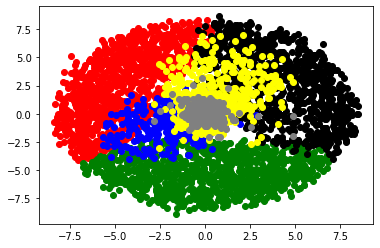

In [25]:
import matplotlib.pyplot as plt 
plt.scatter(label0.values[:1000,0],label0.values[:1000,1],color = "red")
plt.scatter(label1.values[:1000,0],label1.values[:1000,1],color = "green")
plt.scatter(label2.values[:1000,0],label2.values[:1000,1],color = "black")
plt.scatter(label3.values[:1000,0],label3.values[:1000,1],color = "blue")
plt.scatter(label4.values[:1000,0],label4.values[:1000,1],color = "yellow")
plt.scatter(label5.values[:1000,0],label5.values[:1000,1],color = "gray")
plt.show()

In [26]:
all_ppg_2_22 = pd.DataFrame()
for i in range(2,23):
  df = pd.read_csv("/content/gdrive/MyDrive/data/PPG_/"+str(i)+".csv")
  all_ppg_2_22 = pd.concat(objs = [all_ppg_2_22 , df] ,axis = 0,ignore_index = True )
  print(i)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [27]:
all_ppg_2_22

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.626660,0.547210,0.47260,0.406270,0.350510,0.306410,0.27399,0.25228,0.23964,0.23397,...,0.74482,0.82479,0.88590,0.92470,0.93946,0.93015,0.89849,0.84767,0.78203,0.706600
1,0.038500,0.057440,0.08861,0.132970,0.190530,0.260180,0.33985,0.42655,0.51669,0.60637,...,0.05267,0.05805,0.06082,0.06036,0.05660,0.05009,0.04208,0.03443,0.02951,0.029980
2,0.022790,0.024570,0.02600,0.028050,0.032100,0.039810,0.05300,0.07341,0.10256,0.14146,...,0.00840,0.00365,0.00080,0.00000,0.00116,0.00397,0.00790,0.01232,0.01658,0.020160
3,0.245200,0.260090,0.27128,0.278490,0.281820,0.281700,0.27876,0.27377,0.26749,0.26060,...,0.11479,0.11281,0.11491,0.12155,0.13270,0.14788,0.16619,0.18644,0.20725,0.227260
4,0.576570,0.503680,0.42721,0.353030,0.286310,0.231070,0.18983,0.16350,0.15142,0.15160,...,0.37350,0.45685,0.53778,0.61003,0.66785,0.70663,0.72333,0.71686,0.68809,0.639870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205846,0.023608,0.006408,0.00000,0.006105,0.025813,0.059443,0.10642,0.16530,0.23382,0.30909,...,0.36970,0.33777,0.30459,0.26979,0.23327,0.19525,0.15646,0.11807,0.08173,0.049485
205847,0.200210,0.198560,0.19711,0.196190,0.196080,0.197000,0.19914,0.20256,0.20729,0.21327,...,0.18232,0.18736,0.19207,0.19617,0.19946,0.20179,0.20311,0.20346,0.20295,0.201770
205848,0.530510,0.450780,0.37326,0.303230,0.244790,0.200590,0.17170,0.15766,0.15674,0.16627,...,0.48017,0.56806,0.64505,0.70563,0.74549,0.76194,0.75419,0.72343,0.67268,0.606510
205849,0.653840,0.675060,0.69403,0.708130,0.715170,0.713620,0.70260,0.68207,0.65270,0.61576,...,0.69176,0.67078,0.64832,0.62748,0.61098,0.60085,0.59826,0.60341,0.61557,0.633120


closest point to cluster center:  [-4.30377157  2.42650719  2.03335524 -0.34421384 -0.03705661 -0.15617537]
closest index of point to cluster center:  73431
   [-4.30377157  2.42650719  2.03335524 -0.34421384 -0.03705661 -0.15617537]
closest point to cluster center:  [ 0.1309007  -5.39697575  1.92994568 -0.24351371 -0.48000204 -0.06369749]
closest index of point to cluster center:  121432
   [ 0.1309007  -5.39697575  1.92994568 -0.24351371 -0.48000204 -0.06369749]
closest point to cluster center:  [ 4.03664918  2.75763731  2.31214607  1.41852838 -0.83720969 -0.94066119]
closest index of point to cluster center:  38059
   [ 4.03664918  2.75763731  2.31214607  1.41852838 -0.83720969 -0.94066119]
closest point to cluster center:  [ 0.01250436 -0.12687537  2.10105997  3.91484208 -1.29574474  2.76309661]
closest index of point to cluster center:  97208
   [ 0.01250436 -0.12687537  2.10105997  3.91484208 -1.29574474  2.76309661]
closest point to cluster center:  [ 0.13581029 -0.06585265  1.5

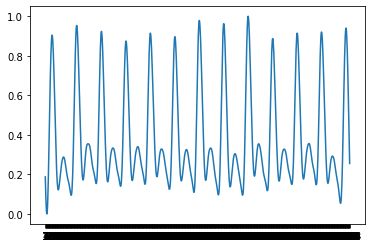

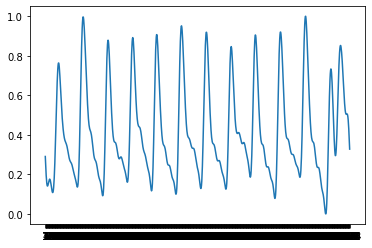

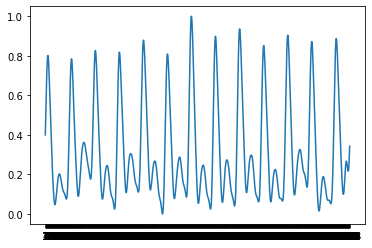

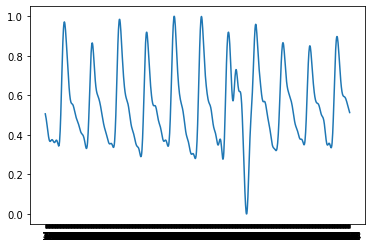

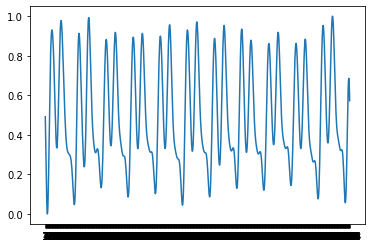

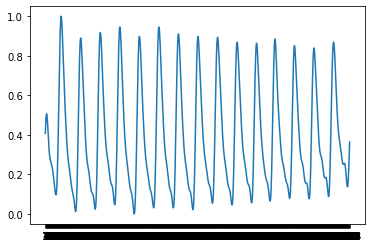

In [28]:
from scipy.spatial.distance import euclidean

# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = data.values[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(data.values[idx], cluster_cen) for idx in cluster_pts_indices])
    
    # Testing:    
    print('closest point to cluster center: ', cluster_pts[min_idx])
    print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    plt.figure(iclust)
    plt.plot(all_ppg_2_22.loc[cluster_pts_indices[min_idx]])
    print('  ', data.values[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

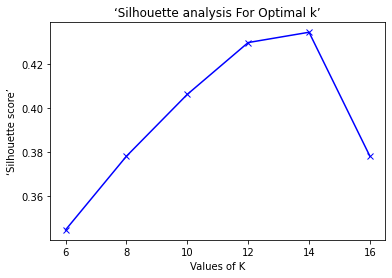

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [ 6, 8,10,12,14,16]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(data)
  cluster_labels = kmeans.labels_
  
  # silhouette score
  silhouette_avg.append(silhouette_score(data, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel('Values of K') 
plt.ylabel("‘Silhouette score’") 
plt.title("‘Silhouette analysis For Optimal k’")y,,,,,
plt.show()